## Using qplot

Loading required package: ggplot2


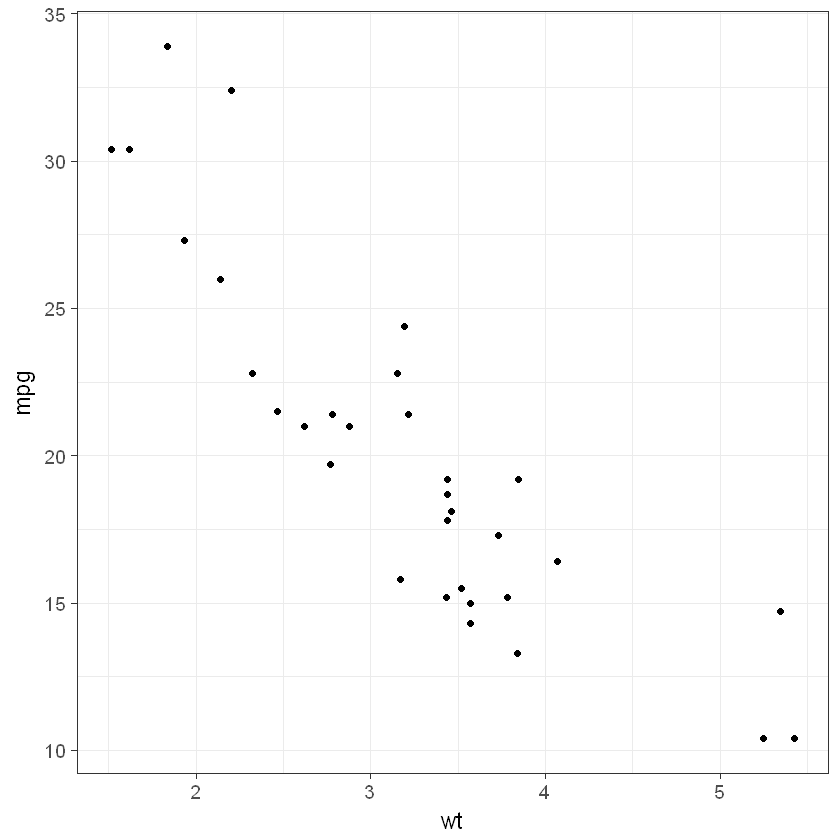

In [1]:
require(ggplot2)
theme_set(theme_bw(base_size=14)) # set theme to white background
qplot(x=wt, y=mpg, data=mtcars)



## Qplot with optional layering


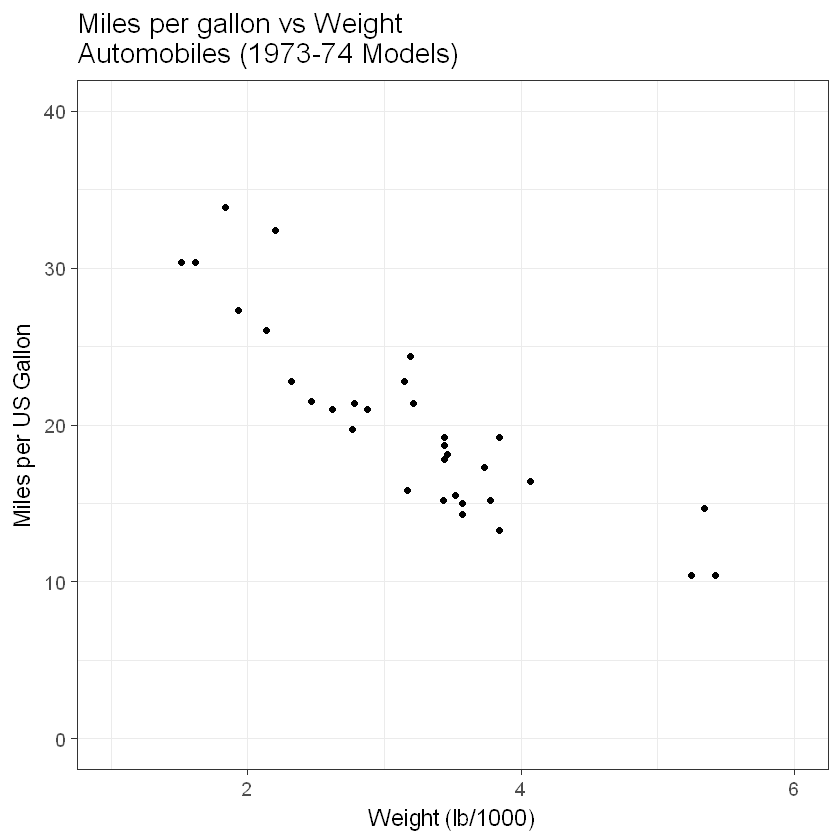

In [2]:
# version 1 using a single call
qplot(x=wt, y=mpg, data=mtcars, main="Miles per gallon vs Weight\nAutomobiles (1973-74 Models)",
    xlab="Weight (lb/1000)", ylab="Miles per US Gallon", xlim=c(1,6), ylim=c(0,40))

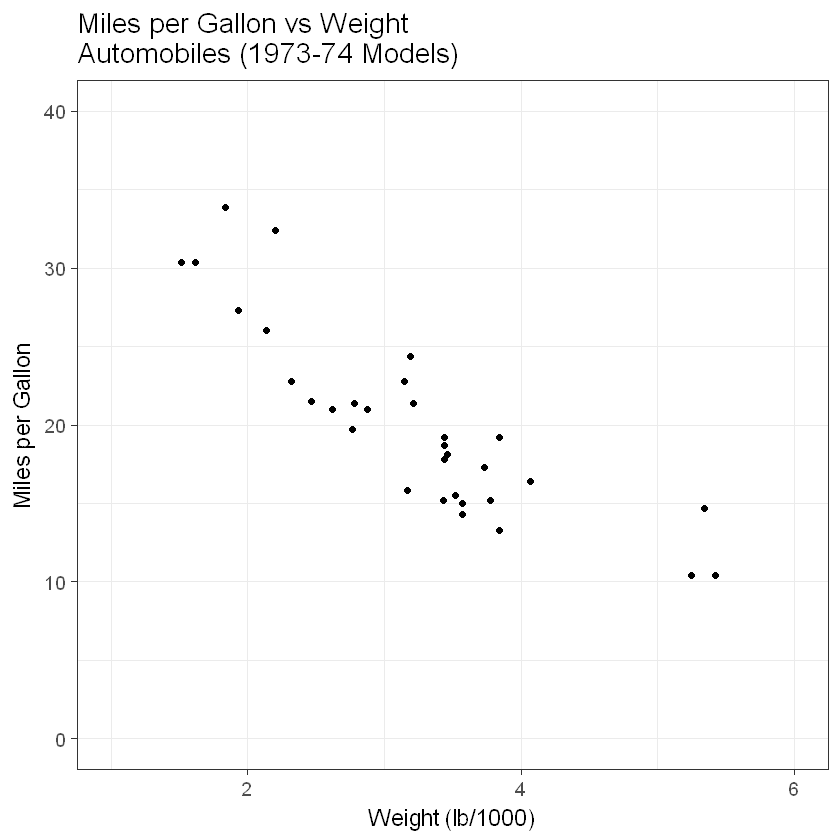

In [3]:
## qplot using additional layers
qplot(x=wt, y=mpg, data=mtcars) + ggtitle("Miles per Gallon vs Weight\nAutomobiles (1973-74 Models)") + xlab("Weight (lb/1000)") +
ylab("Miles per Gallon") + xlim(c(1,6)) + ylim(c(0, 40))

## Plots as objects

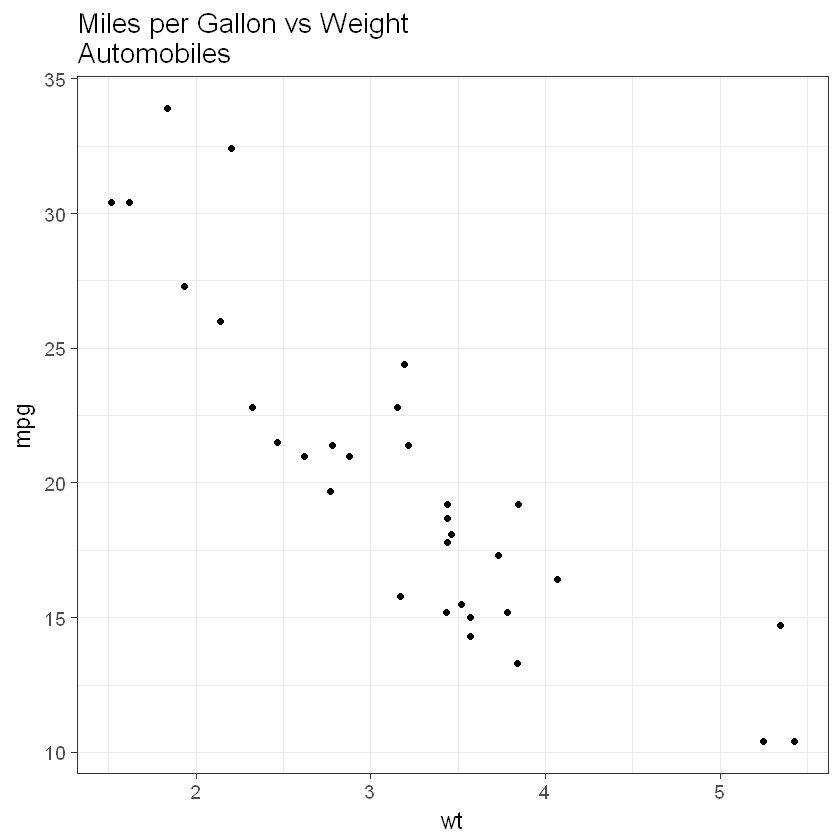

In [4]:
# create a basic plot and save it as an object
basicCarPlot <- qplot(wt, mpg, data=mtcars)

# modify plot to include title
basicCarPlot <- basicCarPlot + ggtitle("Miles per Gallon vs Weight\nAutomobiles")

# print the plot
basicCarPlot

## Exporting ggplot graphics

In [5]:
basicCarPlot <- qplot(wt, mpg, data=mtcars)
ggsave(file="carPlot.jpg", basicCarPlot)

Saving 6.67 x 6.67 in image


## Changing plot types

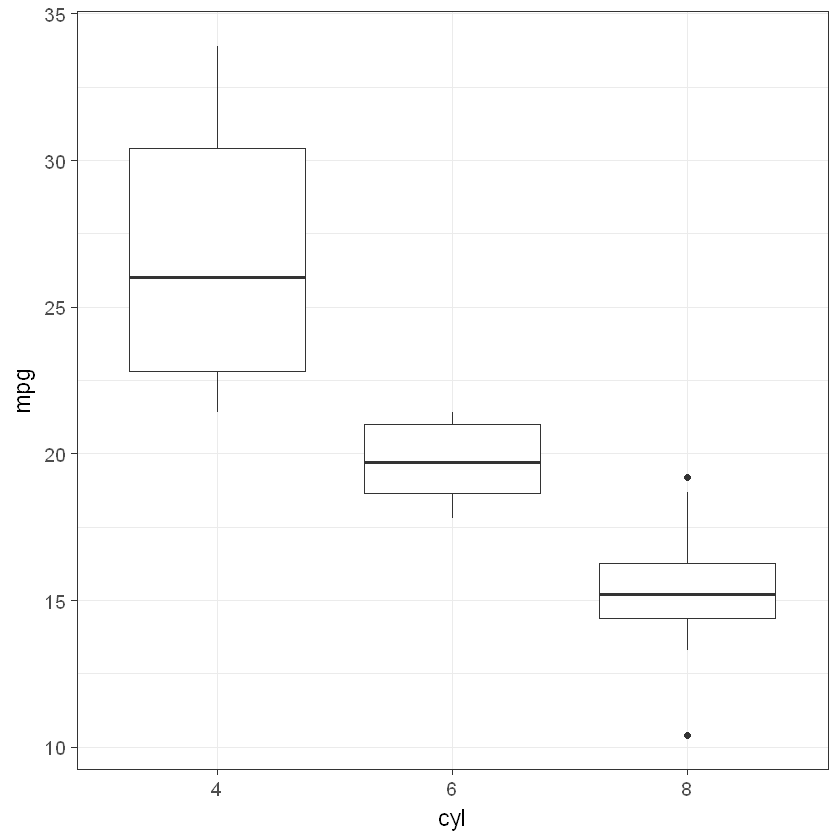

In [6]:
## ensure cyl variable is of the right type
mtcars$cyl <- factor(mtcars$cyl)
qplot(cyl, mpg, data=mtcars, geom="boxplot")

In [7]:
## Plot types
grep("^geom", objects("package:ggplot2"), value=TRUE)

[1] "geom_abline"     "geom_area"       "geom_bar"        "geom_bin2d"     
 [5] "geom_blank"      "geom_boxplot"    "geom_col"        "geom_contour"   
 [9] "geom_count"      "geom_crossbar"   "geom_curve"      "geom_density"   
[13] "geom_density_2d" "geom_density2d"  "geom_dotplot"    "geom_errorbar"  
[17] "geom_errorbarh"  "geom_freqpoly"   "geom_hex"        "geom_histogram" 
[21] "geom_hline"      "geom_jitter"     "geom_label"      "geom_line"      
[25] "geom_linerange"  "geom_map"        "geom_path"       "geom_point"     
[29] "geom_pointrange" "geom_polygon"    "geom_qq"         "geom_quantile"  
[33] "geom_raster"     "geom_rect"       "geom_ribbon"     "geom_rug"       
[37] "geom_segment"    "geom_smooth"     "geom_spoke"      "geom_step"      
[41] "geom_text"       "geom_tile"       "geom_violin"     "geom_vline"

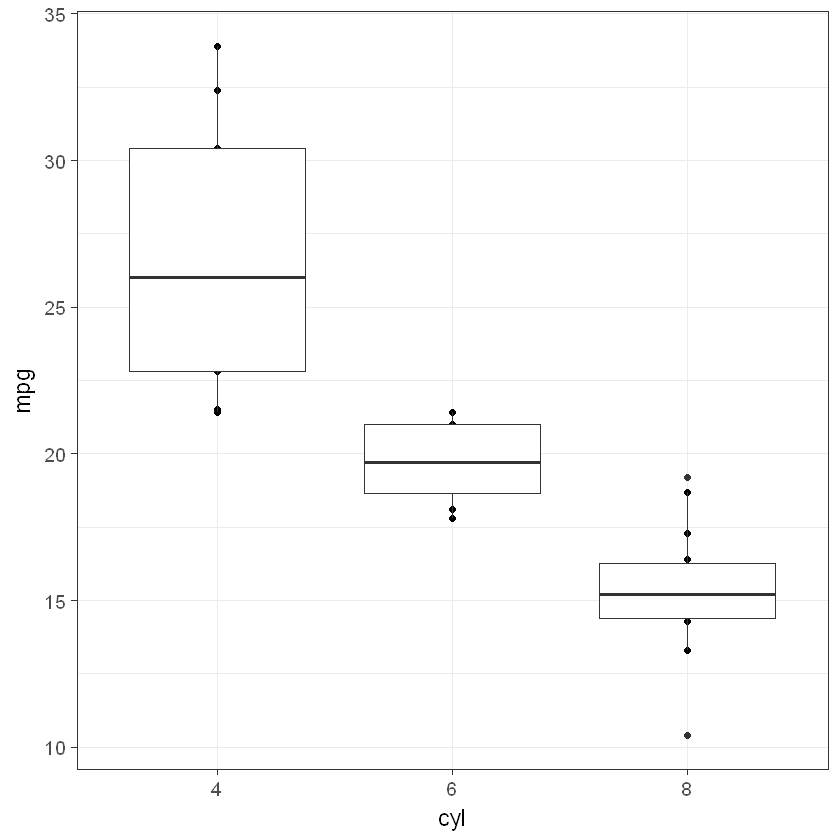

In [8]:
qplot(cyl, mpg, data=mtcars) + geom_boxplot()

## Combining plot types

Warning message:
"Ignoring unknown parameters: method"

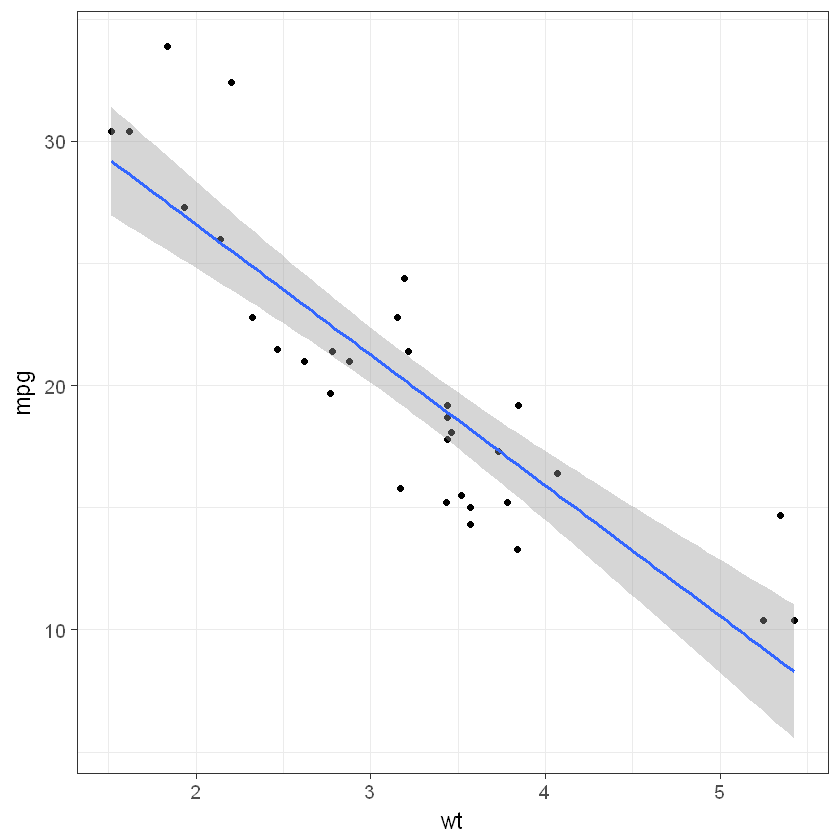

In [13]:
qplot(wt, mpg, data = mtcars, geom = c("point", "smooth"), method = "lm")

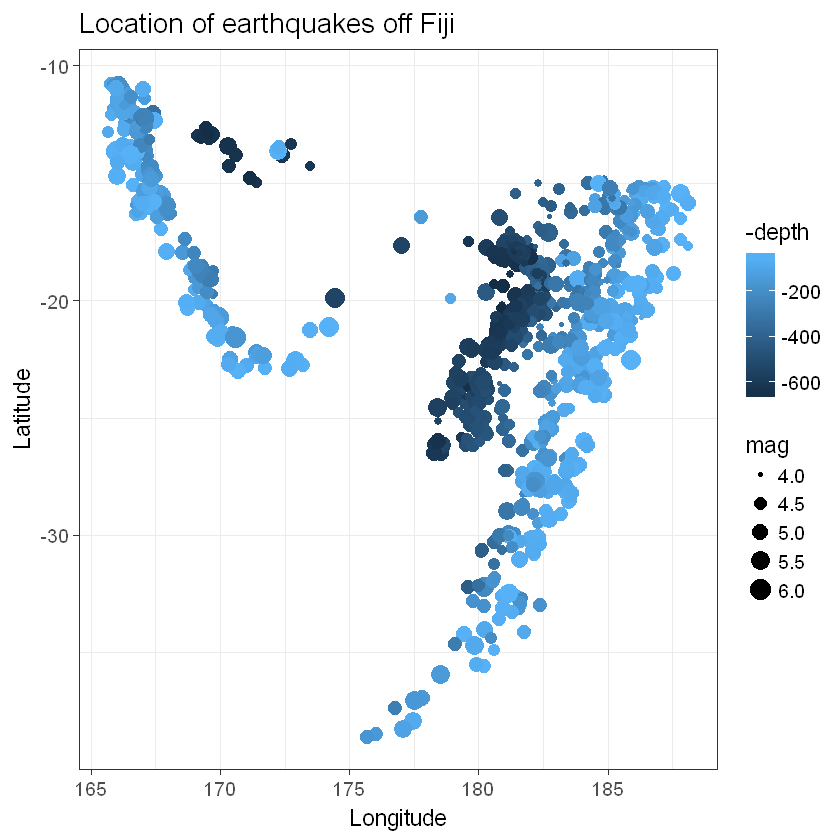

In [15]:
# plot of fiji earthquake locations
qplot(x = long, y = lat, data = quakes, size = mag, col = -depth) + ggtitle("Location of earthquakes off Fiji") + xlab("Longitude") + 
ylab("Latitude")

## Control of Aesthetics 

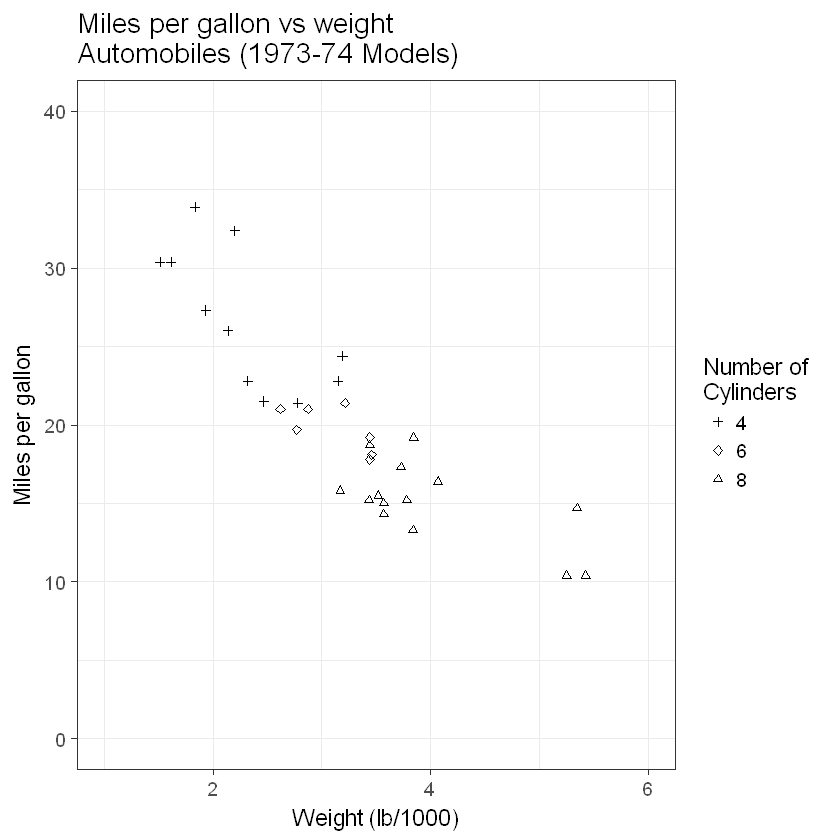

In [17]:
# create a basic plot
carPlot <- qplot(x=wt, y=mpg, data=mtcars, shape=cyl, main="Miles per gallon vs weight\nAutomobiles (1973-74 Models)",
                xlab = "Weight (lb/1000)", ylab="Miles per gallon", xlim=c(1,6), ylim=c(0,40))  #cyl is a factor

# editing plotting symbols and print
carPlot + scale_shape_manual("Number of \nCylinders", values=c(3,5,2))

## Scales and Legend

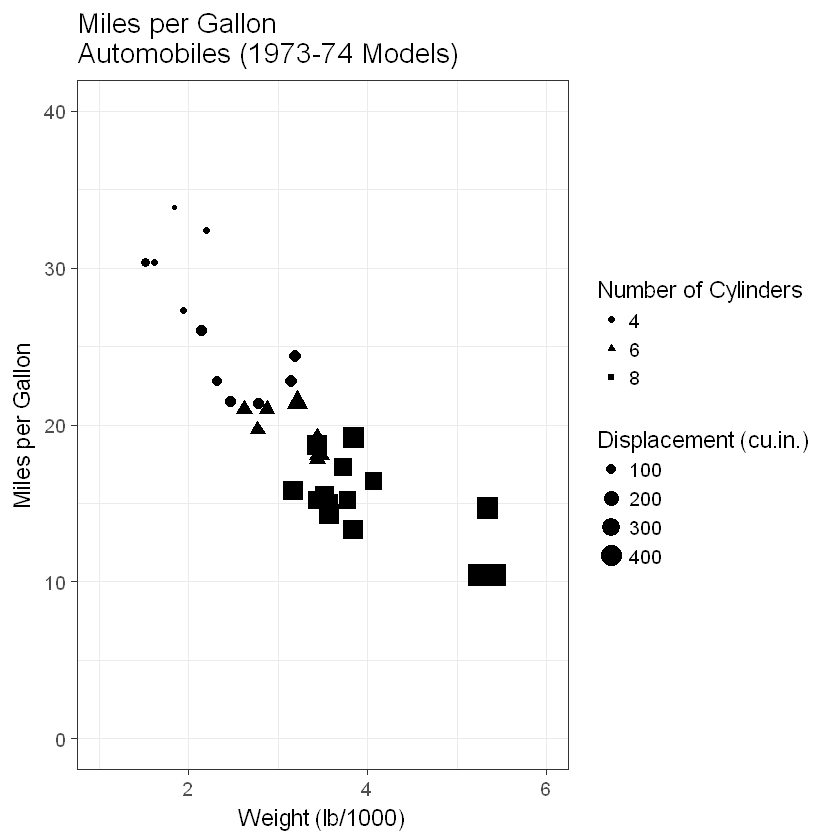

In [27]:
# Create basic plot
mtcars$cyl <- factor(mtcars$cyl)
carPlot <- qplot(x=wt, y=mpg, data=mtcars, shape=cyl, size=disp, main="Miles per Gallon\nAutomobiles (1973-74 Models)",
                xlab="Weight (lb/1000)", ylab="Miles per Gallon", xlim=c(1, 6), ylim=c(0, 40))

# Change Legend titles via scale layers
carPlot + scale_shape_discrete(name="Number of Cylinders") + scale_size_continuous(name= "Displacement (cu.in.)")

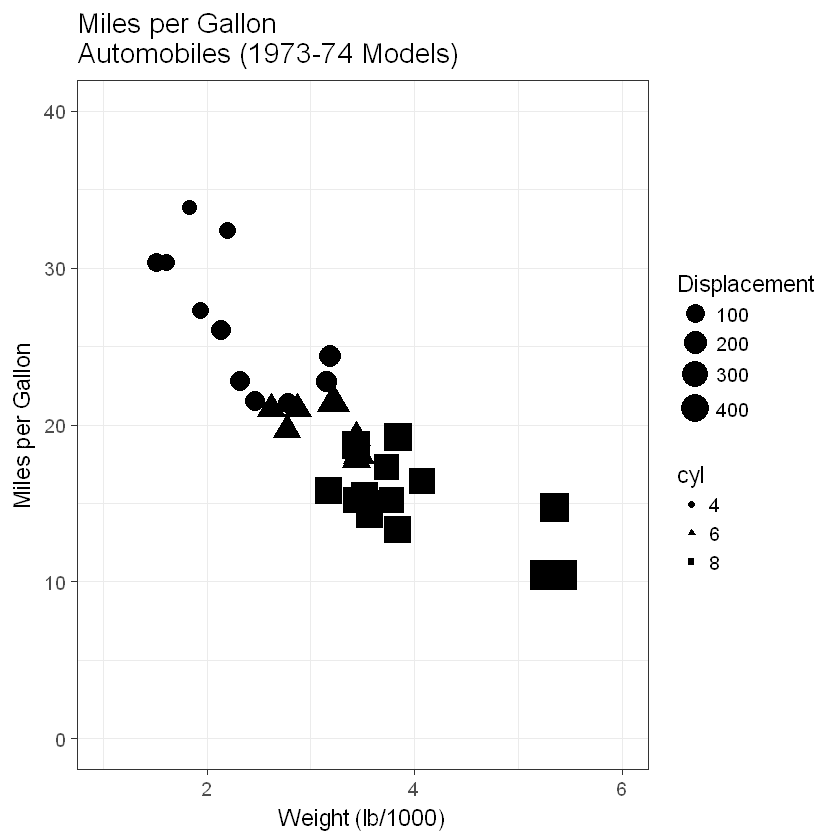

In [28]:
carPlot + scale_size_continuous("Displacement", range=c(4,8))

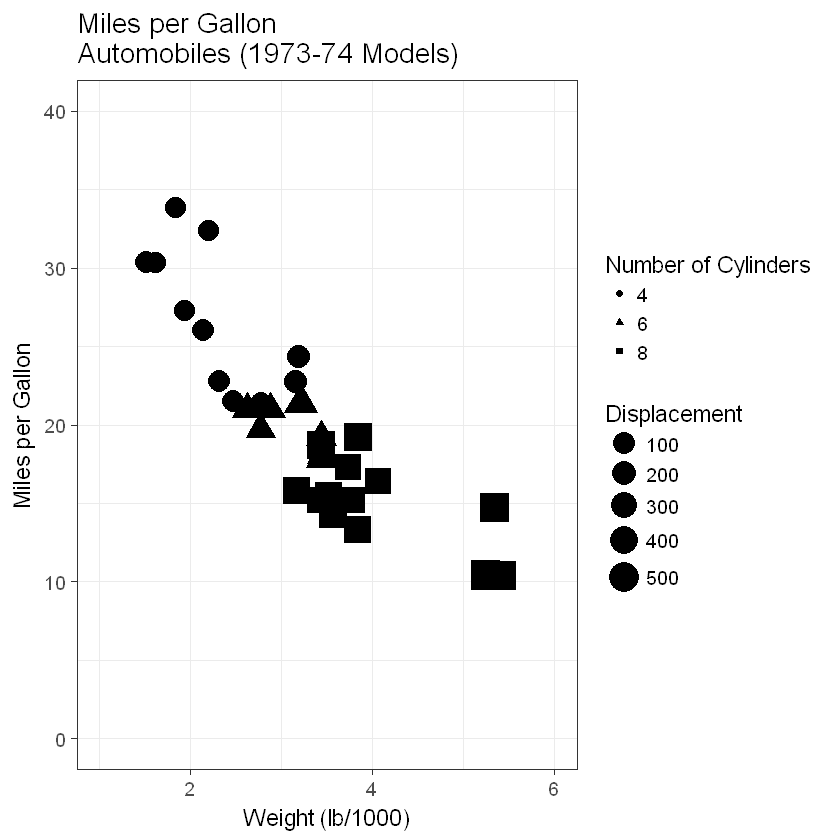

In [29]:
carPlot + scale_shape_discrete("Number of Cylinders") + scale_size_continuous("Displacement", range=c(4,8),
                                                                             breaks=seq(100, 500, by=100), limits=c(0, 500))

## Working with grouped data

In [30]:
library(mangoTraining)
head(pkData)

Subject,Dose,Time,Conc
1,25,0,0.00
1,25,1,660.13
1,25,6,178.92
1,25,12,88.99
1,25,24,42.71
2,25,0,0.00


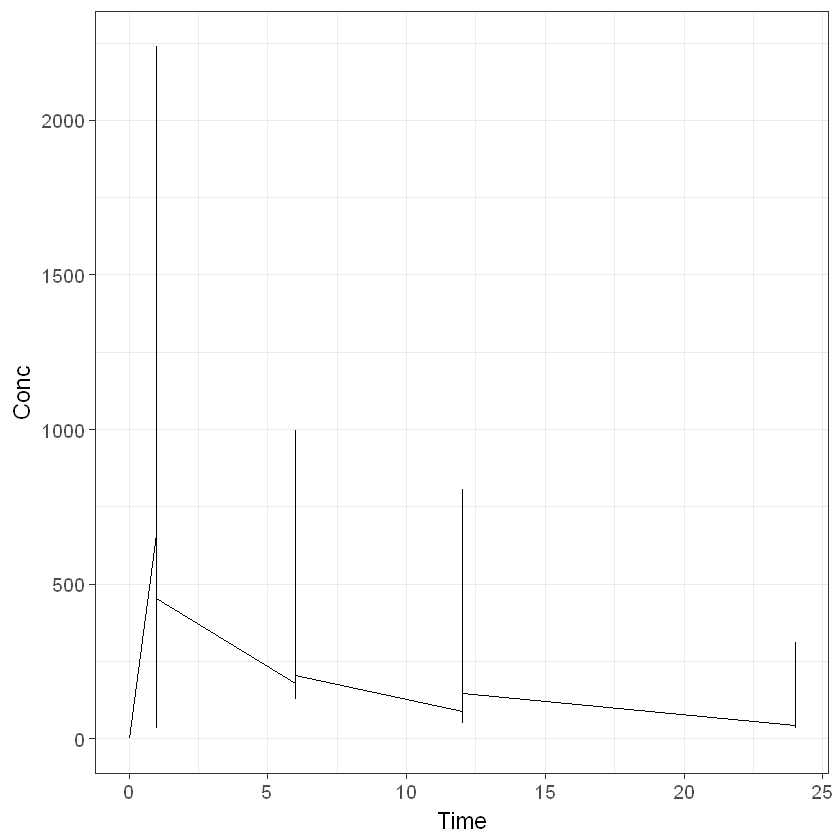

In [33]:
qplot(data=pkData, x=Time, y=Conc, geom="line") # Not the desired result

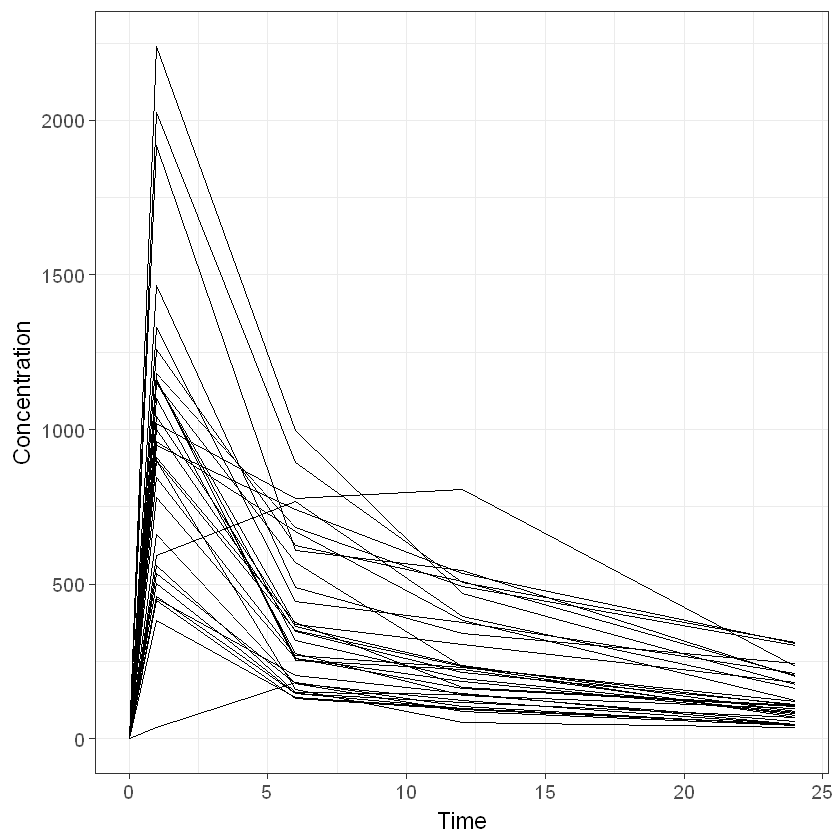

In [38]:
qplot(data=pkData, x = Time, y = Conc, geom="path", group = Subject, ylab="Concentration")

## Panelling or Faceting 

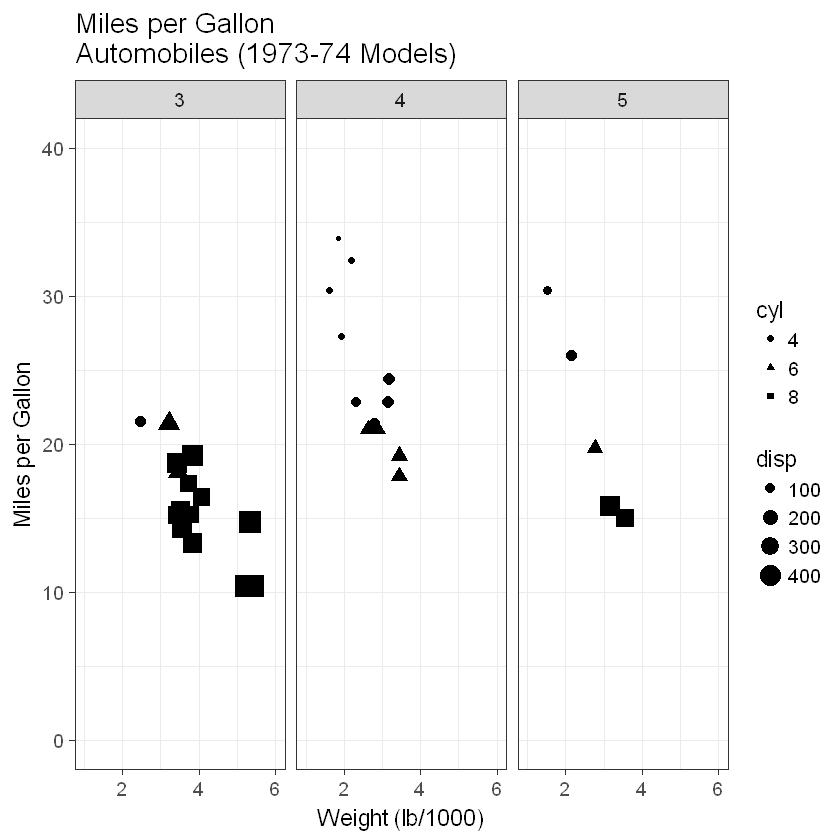

In [39]:
carPlot + facet_grid(. ~ gear)

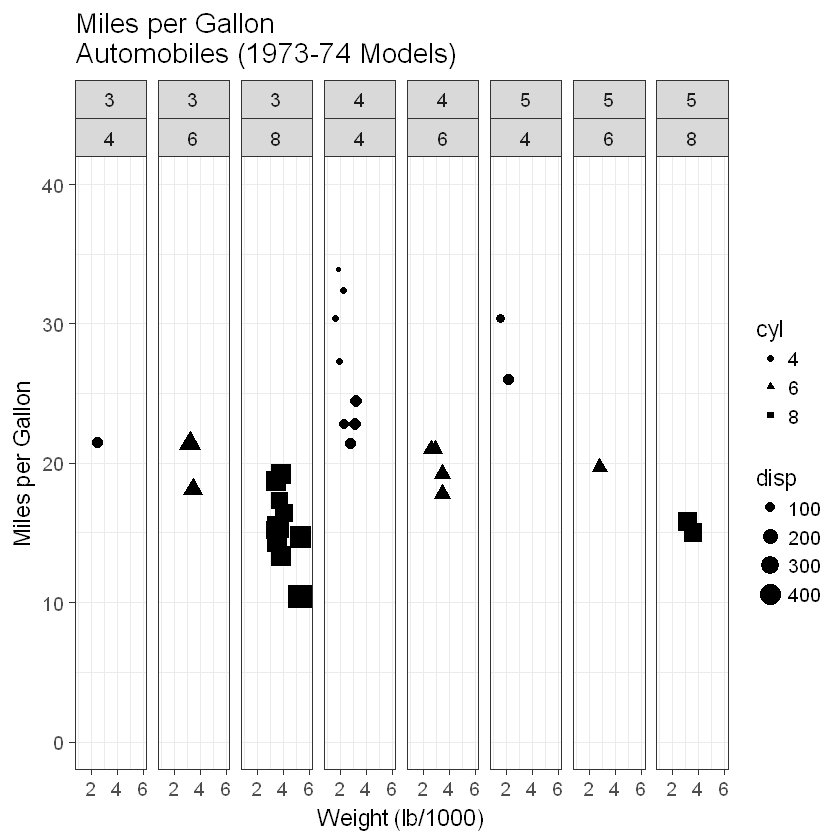

In [40]:
carPlot + facet_grid(. ~ gear + cyl)

In [51]:
# using facet_wrap
#carPlot + facet_wrap( ~ gear)

ERROR: Error in carPlot + facet_wrap(~gear): non-numeric argument to binary operator


# Working with ggplot

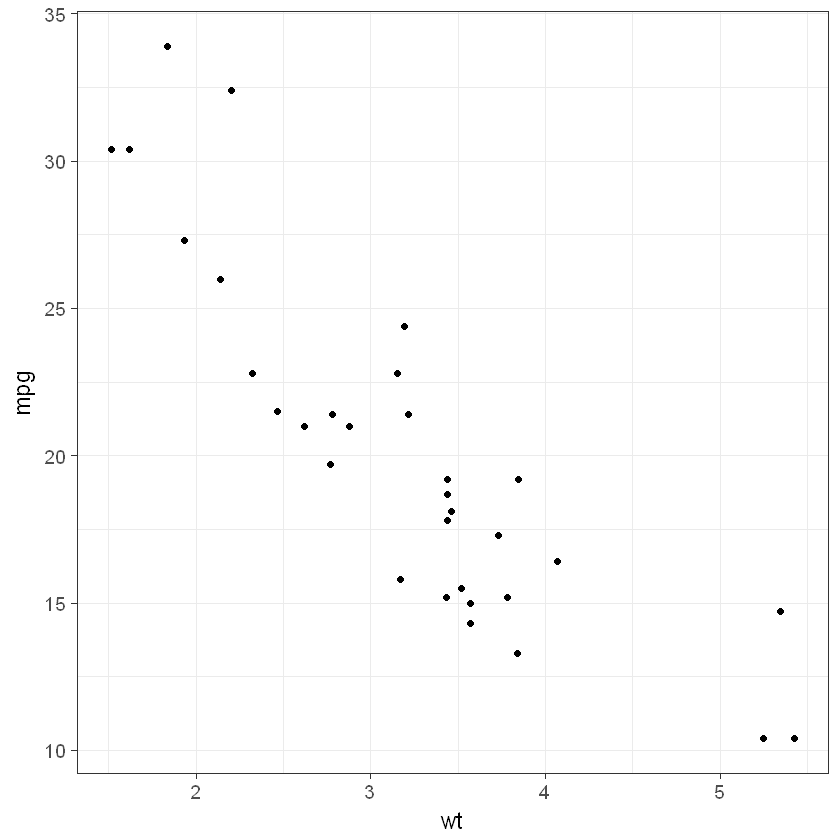

In [52]:
## aes describes how columns of data should be mapped
ggplot() + geom_point(data=mtcars, aes(x=wt, y=mpg))

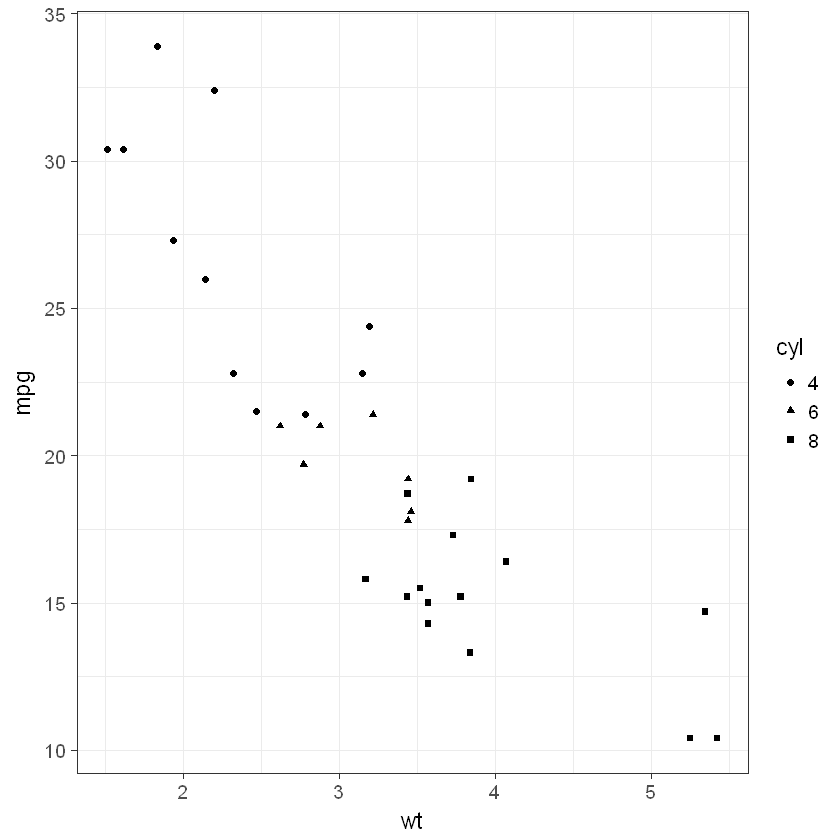

In [56]:
ggplot() + geom_point(data=mtcars, aes(x=wt, y=mpg, shape = cyl))

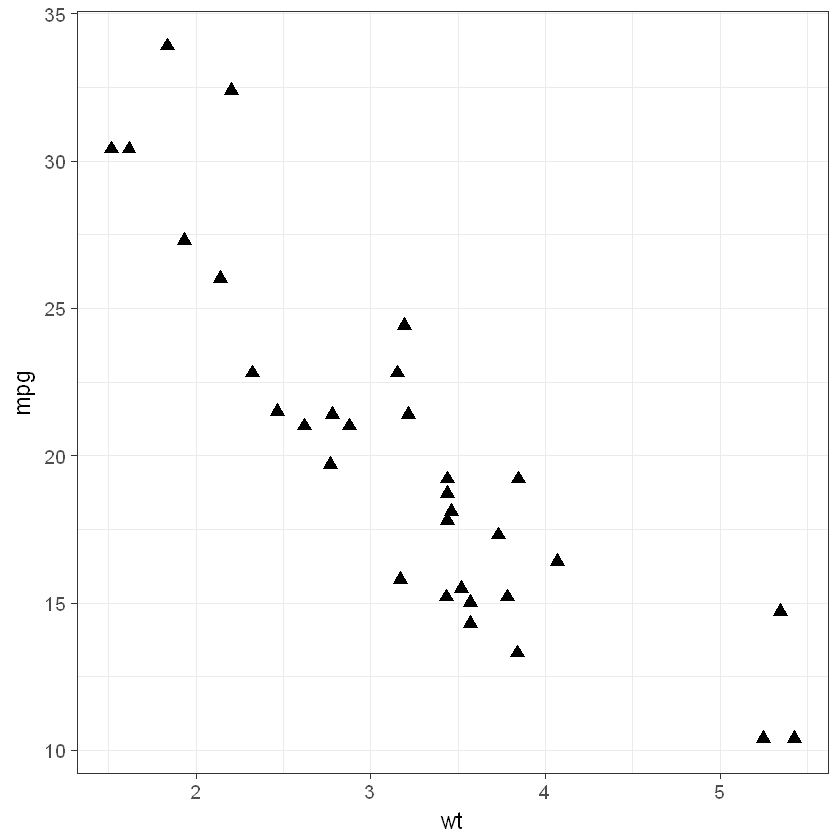

In [57]:
ggplot() + geom_point(data = mtcars, aes(x=wt, y=mpg), shape=17, size=3)  
#because shape and size are outside variables
# we put them outside the aes fucntion

## Where to specify Aesthetics

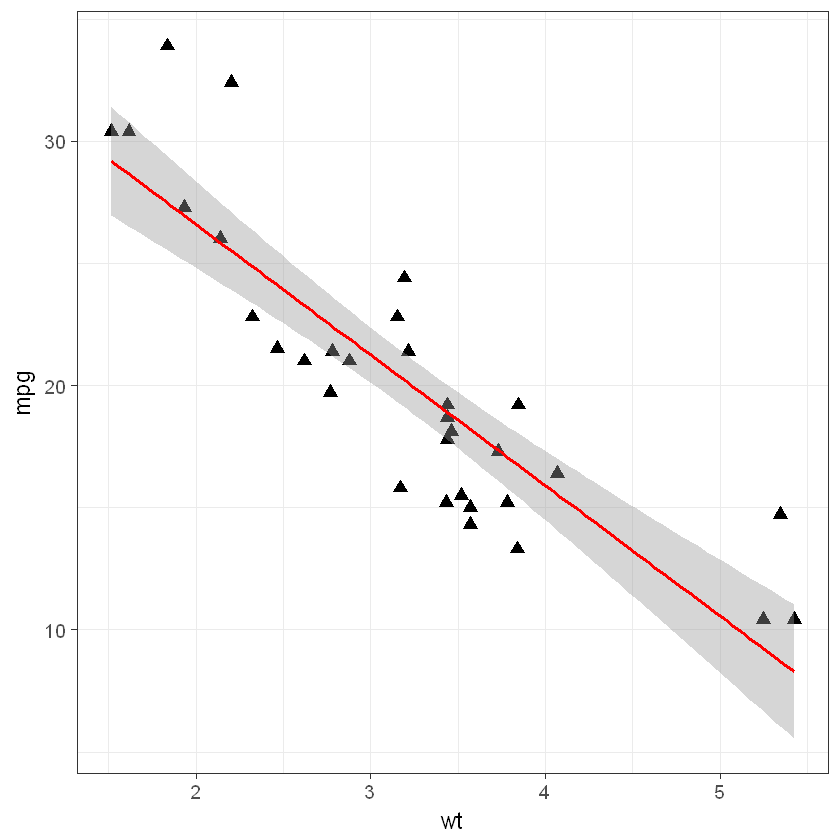

In [59]:
ggplot(data = mtcars, aes(x=wt, y=mpg)) + geom_point(shape=17, size=3) + geom_smooth(method="lm", se=TRUE, col="red")

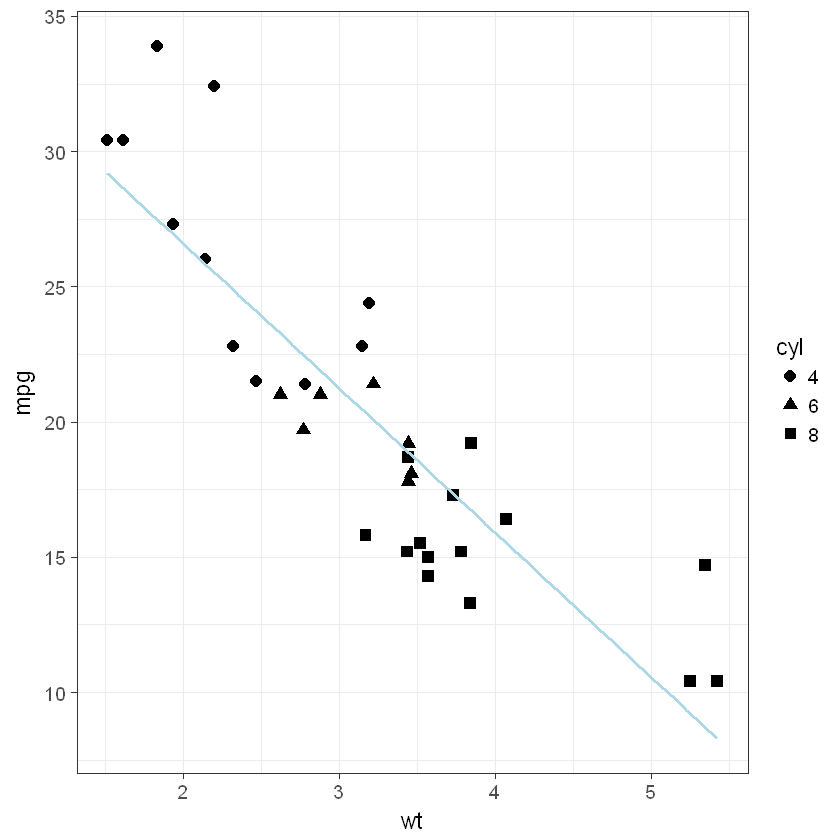

In [62]:
ggplot(data = mtcars, aes(x=wt, y=mpg)) + geom_point(aes(shape=cyl), size=3) + geom_smooth(method="lm", se=FALSE, col="lightblue")

## Working with multiple DataFrames

In [67]:
# Create a copy  of the mtcars data to be used as a shadow
require(dplyr)  # to use the select function
carCopy <- mtcars %>% select(-cyl)   # the cyl column has been removed
head(carCopy)

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,225,105,2.76,3.460,20.22,1,0,3,1


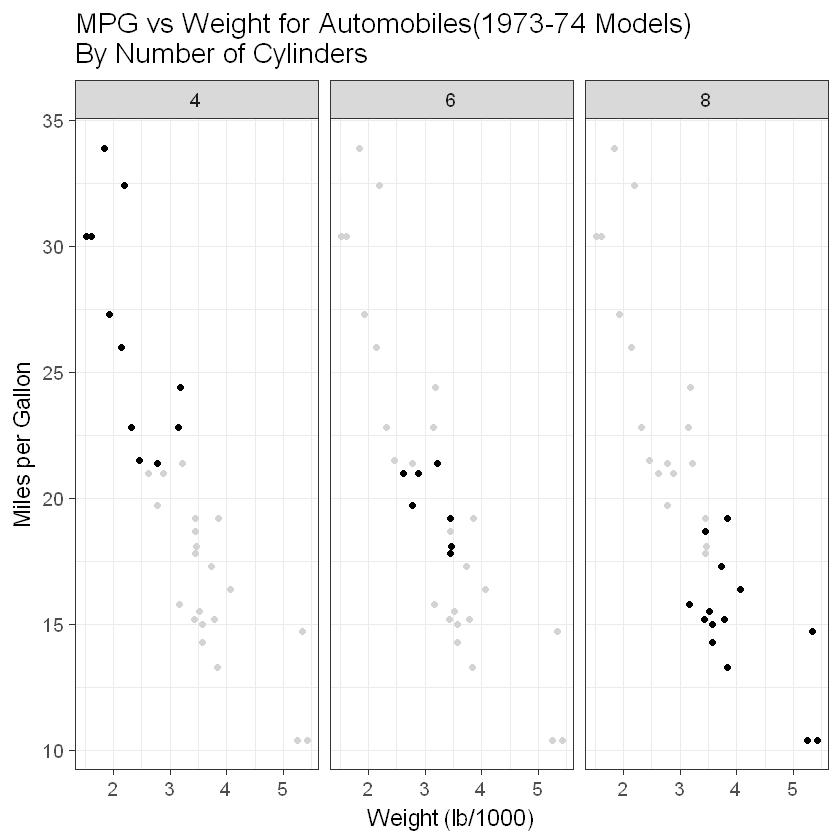

In [68]:
# use layers to control the colors of the points
ggplot() + geom_point(data=carCopy, aes(x=wt, y=mpg), color="lightgrey") + geom_point(data=mtcars, aes(x=wt, y=mpg)) +
facet_grid( ~ cyl) + ggtitle("MPG vs Weight for Automobiles(1973-74 Models)\nBy Number of Cylinders") + 
xlab("Weight (lb/1000)") + ylab("Miles per Gallon")

## Tweaking individual plots


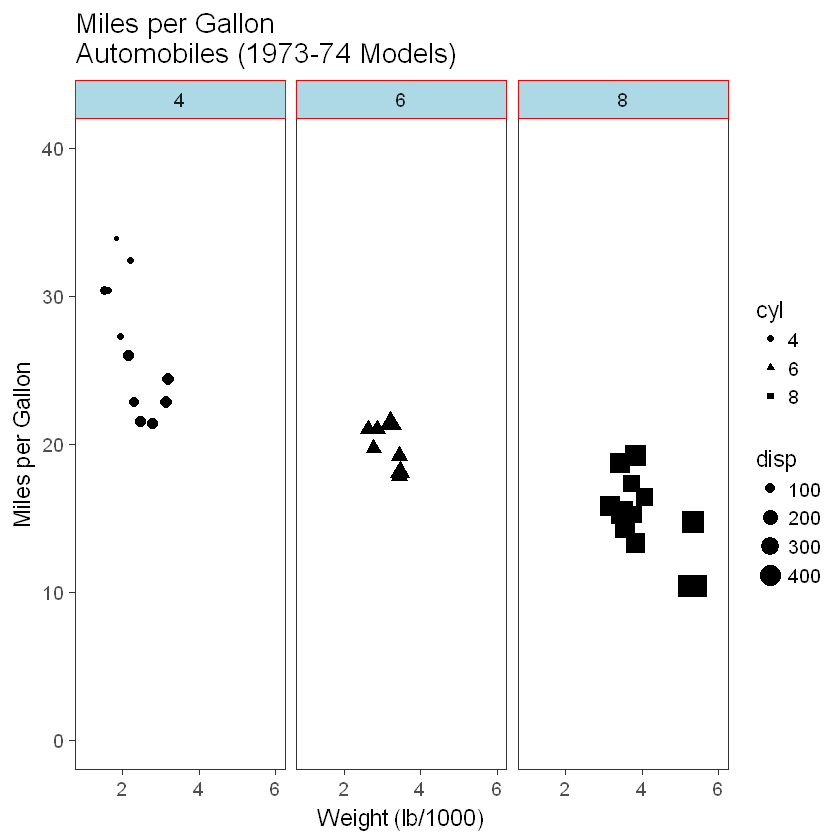

In [73]:
carPlot <- qplot(x=wt, y=mpg, data=mtcars, shape=cyl, size=disp, main="Miles per Gallon\nAutomobiles (1973-74 Models)",
                xlab="Weight (lb/1000)", ylab="Miles per Gallon", xlim=c(1, 6), ylim=c(0, 40))

carPlot + facet_grid( ~ cyl) + theme(strip.background = element_rect(color="red", fill="lightblue"),
                                    panel.grid.minor = element_blank(),
                                    panel.grid.major = element_blank())